## Task 1: Top Cuisines

## Determine the top three most common cuisines in the dataset.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as mt

In [ ]:
data = pd.read_csv('Dataset.csv')

In [ ]:
data.head(5)

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229


In [ ]:
data_Cuisines = data['Cuisines']

In [ ]:
data_Cuisines

0             French, Japanese, Desserts
1                               Japanese
2       Seafood, Asian, Filipino, Indian
3                        Japanese, Sushi
4                       Japanese, Korean
                      ...               
9546                             Turkish
9547     World Cuisine, Patisserie, Cafe
9548              Italian, World Cuisine
9549                     Restaurant Cafe
9550                                Cafe
Name: Cuisines, Length: 9551, dtype: object

In [ ]:
data_Cuisines_counts = data_Cuisines.value_counts()

In [ ]:
data_Cuisines_counts

North Indian                                             936
North Indian, Chinese                                    511
Chinese                                                  354
Fast Food                                                354
North Indian, Mughlai                                    334
                                                        ... 
Bengali, Fast Food                                         1
North Indian, Rajasthani, Asian                            1
Chinese, Thai, Malaysian, Indonesian                       1
Bakery, Desserts, North Indian, Bengali, South Indian      1
Italian, World Cuisine                                     1
Name: Cuisines, Length: 1825, dtype: int64

In [ ]:
cuisine_top = data_Cuisines_counts.head(3)

In [ ]:
cuisine_top

North Indian             936
North Indian, Chinese    511
Chinese                  354
Name: Cuisines, dtype: int64

In [ ]:
count_restaurants = len(data)

## Calculate the percentage of restaurants that serve each of the top cuisines.

In [ ]:
count_restaurants

9551

In [ ]:
per = (cuisine_top/count_restaurants)*100
per

North Indian             9.800021
North Indian, Chinese    5.350225
Chinese                  3.706418
Name: Cuisines, dtype: float64

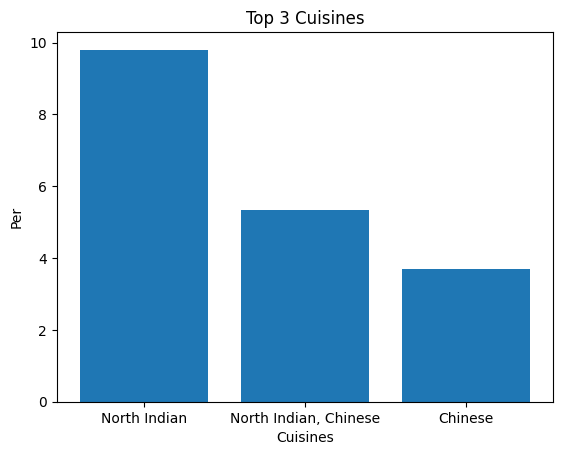

In [ ]:
mt.bar(per.index, per.values)
mt.xlabel("Cuisines")
mt.ylabel("Per")
mt.title("Top 3 Cuisines")
mt.show()

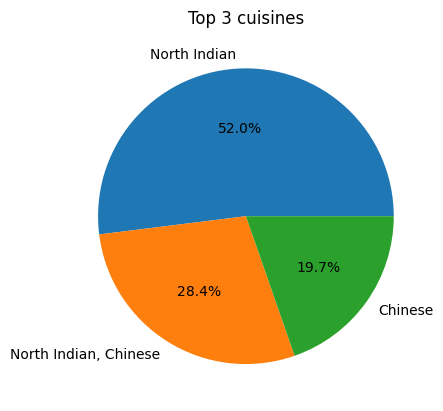

In [ ]:
mt.pie(cuisine_top, labels= cuisine_top.index, autopct= '%1.1f%%')
mt.title("Top 3 cuisines")
mt.show()

##Task 2: City Analysis

## Identify the city with the highest number of restaurants in the dataset.

In [ ]:
count_rest = data.groupby('City')['Restaurant ID'].count()

In [ ]:
count_rest

City
Abu Dhabi          20
Agra               20
Ahmedabad          21
Albany             20
Allahabad          20
                   ..
Weirton             1
Wellington City    20
Winchester Bay      1
Yorkton             1
��stanbul          14
Name: Restaurant ID, Length: 141, dtype: int64

In [ ]:
high_res_city = count_rest.idxmax()

In [ ]:
high_res_city

'New Delhi'

In [ ]:
print("The highest number of restaurants in a city: ", high_res_city)

The highest number of restaurants in a city:  New Delhi


## Calculate the average rating for restaurants in each city.

In [ ]:
avg_rating = data.groupby('City')['Aggregate rating'].mean()

In [ ]:
avg_rating

City
Abu Dhabi          4.300000
Agra               3.965000
Ahmedabad          4.161905
Albany             3.555000
Allahabad          3.395000
                     ...   
Weirton            3.900000
Wellington City    4.250000
Winchester Bay     3.200000
Yorkton            3.300000
��stanbul          4.292857
Name: Aggregate rating, Length: 141, dtype: float64

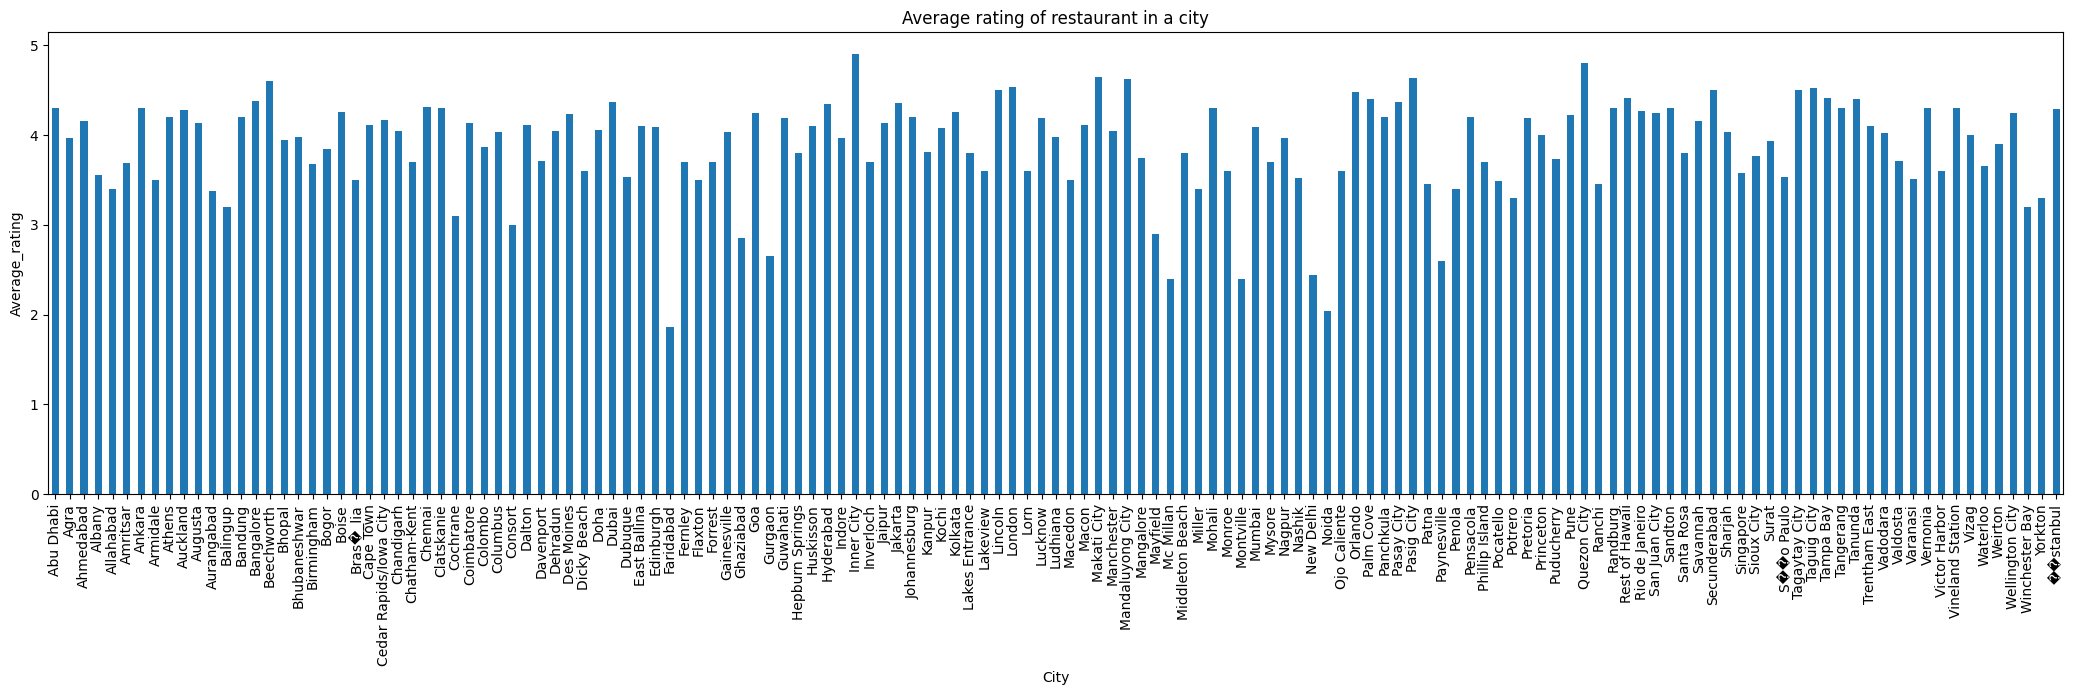

In [ ]:
avg_rating.plot(kind = 'bar', figsize= (26,6))
mt.xlabel('City')
mt.ylabel('Average_rating')
mt.title("Average rating of restaurant in a city")
mt.show()

## Determine the city with the highest average rating.

In [ ]:
high_avg_rating_city = avg_rating.idxmax()

In [ ]:
high_avg_rating_city

'Inner City'

## Task 3: Price Range Distribution

## Create a histogram or bar chart to visualize the distribution of price ranges among the restaurants.

## Calculate the percentage of restaurants in each price range category.

In [ ]:
counts_price_range = data['Price range'].value_counts().sort_index()

In [ ]:
counts_price_range

1    4444
2    3113
3    1408
4     586
Name: Price range, dtype: int64

In [ ]:
per_price_range = (counts_price_range/len(data))*100

In [ ]:
per_price_range

1    46.529159
2    32.593446
3    14.741912
4     6.135483
Name: Price range, dtype: float64

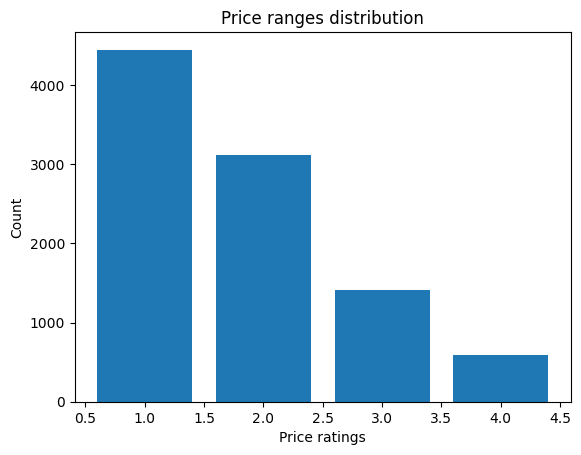

In [ ]:
mt.bar(counts_price_range.index, counts_price_range.values)
mt.xlabel('Price ratings')
mt.ylabel('Count')
mt.title("Price ranges distribution")
mt.show()

## Task 4 : online delivery

## Determine the percentage of restaurants that offer online delivery.





In [ ]:
online_delivery_res = data['Has Online delivery'].value_counts().get('Yes', 0)
per_online_delivery_res = (online_delivery_res/len(data))*100
per_online_delivery_res


25.662234321013504

In [ ]:
online_delivery_res

2451



## Compare the average ratings of restaurants with and without online delivery.



In [ ]:
avg_rating_with_online_delivery = data[data['Has Online delivery']== 'Yes']['Aggregate rating'].mean()
avg_rating_without_online_delivery = data[data['Has Online delivery']== 'No']['Aggregate rating'].mean()

In [ ]:
avg_rating_with_online_delivery

3.2488372093023257

In [ ]:
avg_rating_without_online_delivery

2.465295774647887

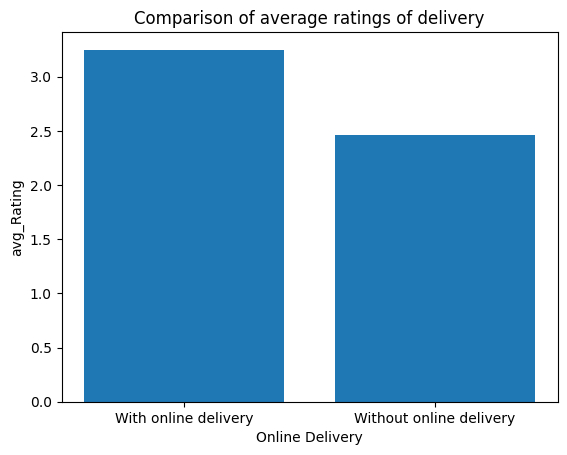

In [ ]:
labels = ['With online delivery', 'Without online delivery']
avg_Ratings = [avg_rating_with_online_delivery, avg_rating_without_online_delivery]
mt.bar(labels, avg_Ratings)
mt.xlabel('Online Delivery')
mt.ylabel('avg_Rating')
mt.title('Comparison of average ratings of delivery')
mt.show()